# Kaggle competition info

## Overview
Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

**Your Goal:** Predict the probability that a patient will be diagnosed with diabetes.

**Link**: <https://www.kaggle.com/competitions/playground-series-s5e12/overview>


In [ ]:
# !pip install -q xgboost lightgbm catboost

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os, time

import seaborn as sns

import matplotlib.pyplot as plt


from sklearn import metrics

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report ,  ConfusionMatrixDisplay, 
                             roc_curve,  roc_auc_score)




# model
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


In [2]:
class CFG:

    trainFile = "/kaggle/input/playground-series-s5e12/train.csv"
    testFile = "/kaggle/input/playground-series-s5e12/test.csv"
    sampleFile = "/kaggle/input/playground-series-s5e12/test.csv"
    targetCol = "diagnosed_diabetes"
    idCol = "id"
    

In [3]:
def printAllcolumnsValue(df, showAll=True):
    for col in df.columns:
        if showAll :
            print(f"{col} : {df[col].unique()}") # print unique value
        else: # only print catergory column
            if df[col].dtype == "object":
                print(f"{col} : {df[col].unique()}") # print unique value

In [4]:
trainDF = pd.read_csv(CFG.trainFile)
trainDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


In [5]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [6]:
trainDF.isnull().sum() # check Null 

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [7]:
testDF = pd.read_csv(CFG.testFile)
testDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [56]:
submit = pd.read_csv(CFG.sampleFile)
submit

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [8]:
testDF.isnull().sum() # check Null 

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [9]:
trainDF.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [10]:
testDF.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history'],
      dtype='object')

# Data preprocessing 

In [11]:

printAllcolumnsValue(trainDF, showAll=False)

gender : ['Female' 'Male' 'Other']
ethnicity : ['Hispanic' 'White' 'Asian' 'Black' 'Other']
education_level : ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
income_level : ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
smoking_status : ['Current' 'Never' 'Former']
employment_status : ['Employed' 'Retired' 'Student' 'Unemployed']


In [12]:
printAllcolumnsValue(testDF, showAll=False)

gender : ['Female' 'Male' 'Other']
ethnicity : ['White' 'Hispanic' 'Black' 'Asian' 'Other']
education_level : ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
income_level : ['Middle' 'Low' 'Lower-Middle' 'Upper-Middle' 'High']
smoking_status : ['Former' 'Never' 'Current']
employment_status : ['Employed' 'Unemployed' 'Retired' 'Student']


In [13]:
# Ordinal mappings each catergoy into numberic representation
genderMap = {"Female": 0, "Male": 1,  "Other": 2}
ethnicityMap = {"Hispanic": 0 , "White": 1, "Asian": 2, "Black": 3, "Other": 4}
eduLvlMap = {"Highschool": 0, "Graduate":1 , "Postgraduate": 2, "No formal": 3}
incomeLvlMap = {"Lower-Middle": 0 , "Upper-Middle":1 , "Low":2 , "Middle": 3, "High": 4}
smokingMap = {"Never": 0, "Current": 1,  "Former": 2}
employmentMap = {"Employed": 0,  "Retired": 1, "Student": 2,  "Unemployed": 3}

In [14]:
def cleanData(df):
    tempDF = df.copy()
    
    # convert catergoy into numberic column
    tempDF["gender"]= tempDF["gender"].map(genderMap)
    tempDF["ethnicity"]= tempDF["ethnicity"].map(ethnicityMap)
    tempDF["education_level"]= tempDF["education_level"].map(eduLvlMap)
    tempDF["income_level"] = tempDF["income_level"].map(incomeLvlMap)
    tempDF["employment_status"] = tempDF["employment_status"].map(employmentMap)
    tempDF["smoking_status"]= tempDF["smoking_status"].map(smokingMap)
    print(tempDF.head(5))
    print(tempDF.isnull().sum()) 
    return tempDF
    

In [15]:
def featureEngineering(df):
    tempDF = df.copy()
    
    tempDF['MAP'] = (tempDF['systolic_bp'] + 2 * tempDF['diastolic_bp']) / 3 # Mean Arterial Pressure
    tempDF['Pulse_Pressure'] = tempDF['systolic_bp'] - tempDF['diastolic_bp'] 
    tempDF["Non_HDL"] = tempDF["cholesterol_total"] - tempDF["hdl_cholesterol"]
    tempDF["Total_HDL_Ratio"] = tempDF["cholesterol_total"] / (tempDF["hdl_cholesterol"] + 1e-5)
    tempDF["TG_HDL_Ratio"]= tempDF["triglycerides"] / (tempDF["hdl_cholesterol"] + 1e-5)

    tempDF["Metabolic_Syndrome_Index"] = tempDF["bmi"] * tempDF["waist_to_hip_ratio"] # MSI index 
    daily_activity_hr = (tempDF["physical_activity_minutes_per_week"]/7)/60 # daily activity per hour
    tempDF["Active_Balance"]= daily_activity_hr - tempDF["screen_time_hours_per_day"]

    return tempDF
    

In [16]:
# clean train data
trainDF = cleanData(trainDF)

   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity  education_level  \
0            

In [17]:
# Clean test data
testDF = cleanData(testDF)

       id  age  alcohol_consumption_per_week  \
0  700000   45                             4   
1  700001   35                             1   
2  700002   45                             1   
3  700003   55                             2   
4  700004   77                             2   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 100         4.3                  6.8   
1                                  87         3.5                  4.6   
2                                  61         7.6                  6.8   
3                                  81         7.3                  7.3   
4                                  29         7.3                  7.6   

   screen_time_hours_per_day   bmi  waist_to_hip_ratio  systolic_bp  ...  \
0                        6.2  25.5                0.84          123  ...   
1                        9.0  28.6                0.88          120  ...   
2                        7.0  28.5    

In [21]:
trainDF = featureEngineering(trainDF)

In [22]:
trainDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,hypertension_history,cardiovascular_history,diagnosed_diabetes,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,0,0,1.0,84.000000,42,141,3.431034,1.758620,31.062,-5.992857
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,0,0,1.0,91.333333,43,149,3.979999,2.480000,19.754,-5.626190
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,0,0,0.0,91.000000,6,129,3.186440,1.830508,20.003,-8.723810
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,1,0,1.0,86.333333,52,128,3.370370,2.277777,22.078,-9.016667
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,1,0,1.0,76.000000,48,157,4.204081,2.530612,25.920,-4.969048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,0,0,0.0,82.333333,76,105,2.810344,2.172413,22.968,-1.359524
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,0,1,1.0,92.000000,21,143,4.177777,2.644444,21.675,-3.628571
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,0,0,1.0,98.333333,43,109,2.847457,2.813559,23.672,-6.280952
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,0,0,1.0,83.333333,49,143,3.599999,2.418181,21.672,-4.533333


In [23]:
testDF = featureEngineering(testDF)

In [24]:
testDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,family_history_diabetes,hypertension_history,cardiovascular_history,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,0,0,0,87.666667,53,154,3.799999,2.018181,21.420,-5.961905
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,0,0,0,89.333333,46,112,3.382978,3.085106,25.168,-8.792857
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,0,0,0,84.666667,41,130,4.023255,4.279069,26.790,-6.854762
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,0,0,0,92.000000,33,144,3.440677,2.169491,24.479,-4.807143
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,0,0,0,95.666667,53,118,2.999999,2.254237,18.260,-8.430952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,1,0,0,86.000000,33,135,3.499999,2.333333,18.468,-3.959524
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,0,0,0,84.000000,42,115,3.674418,2.604651,27.528,-4.440476
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,0,0,0,85.000000,66,135,5.090908,4.090908,19.327,-7.900000
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,0,1,0,85.000000,54,121,3.419999,2.759999,24.653,-1.628571


In [25]:
trainDF["family_history_diabetes"].value_counts()

family_history_diabetes
0    595419
1    104581
Name: count, dtype: int64

In [26]:
trainDF["hypertension_history"].value_counts()

hypertension_history
0    572607
1    127393
Name: count, dtype: int64

In [27]:
trainDF["cardiovascular_history"].value_counts()

cardiovascular_history
0    678773
1     21227
Name: count, dtype: int64

In [28]:
trainDF.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,hypertension_history,cardiovascular_history,diagnosed_diabetes,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,...,0.181990,0.030324,0.623296,89.058680,40.853269,132.995587,3.556875,2.352618,22.302564,-5.821707
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,...,0.385837,0.171478,0.484560,6.214235,12.159006,18.249329,0.661723,0.651447,3.270597,2.026163
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,...,0.000000,0.000000,0.000000,64.666667,-4.000000,62.000000,1.849315,0.378049,10.626000,-16.419048
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,...,0.000000,0.000000,0.000000,84.666667,32.000000,120.000000,3.089552,1.909091,20.038000,-7.200000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,...,0.000000,0.000000,1.000000,89.000000,41.000000,133.000000,3.462962,2.274509,22.185000,-5.792857
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,...,0.000000,0.000000,1.000000,93.333333,49.000000,146.000000,3.919999,2.706896,24.447000,-4.407143
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,...,1.000000,1.000000,1.000000,117.333333,95.000000,253.000000,10.954540,8.111108,38.582000,0.359524


# EDA

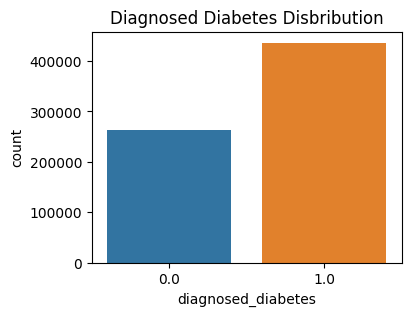

In [29]:
# trainDF[CFG.targetCol].astype(int).value_counts().plot(kind="bar", title="Diagnosed Diabetes Class");
plt.figure(figsize=(4,3))
sns.countplot(data=trainDF, x=CFG.targetCol)
plt.title("Diagnosed Diabetes Disbribution")
plt.show()


# Train Test Dataset Split

In [32]:
featureCols = [c for c in trainDF.columns if c not in [CFG.idCol , CFG.targetCol]]
print(featureCols)

X = trainDF[featureCols].copy()
y = trainDF[CFG.targetCol].astype(int) 

['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'MAP', 'Pulse_Pressure', 'Non_HDL', 'Total_HDL_Ratio', 'TG_HDL_Ratio', 'Metabolic_Syndrome_Index', 'Active_Balance']


In [38]:
# Train/Test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [40]:
X_train.shape  , X_test.shape,  y_train.shape,  y_test.shape

((560000, 31), (140000, 31), (560000,), (140000,))

In [50]:

model1 = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=3500,
    learning_rate = 8e-3,
    max_depth=5, 
    subsample=0.7,
    colsample_bytree=0.4,
    reg_lambda=2.0,
    random_state=42,
    treee_method='hist',
    early_stopping_rounds=200,
    n_jobs=4,
    verbose=1,
)
model1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=200,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3500, n_jobs=4,
              num_parallel_tree=None, random_state=42, ...)

In [53]:
model1.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-auc:0.58500
[1]	validation_0-auc:0.62653


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [14:06:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "treee_method", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-auc:0.62300
[3]	validation_0-auc:0.63383
[4]	validation_0-auc:0.66111
[5]	validation_0-auc:0.65846
[6]	validation_0-auc:0.65380
[7]	validation_0-auc:0.67607
[8]	validation_0-auc:0.68109
[9]	validation_0-auc:0.68902
[10]	validation_0-auc:0.68604
[11]	validation_0-auc:0.68721
[12]	validation_0-auc:0.68827
[13]	validation_0-auc:0.68831
[14]	validation_0-auc:0.68646
[15]	validation_0-auc:0.68718
[16]	validation_0-auc:0.69015
[17]	validation_0-auc:0.68997
[18]	validation_0-auc:0.68935
[19]	validation_0-auc:0.69010
[20]	validation_0-auc:0.69073
[21]	validation_0-auc:0.69089
[22]	validation_0-auc:0.68979
[23]	validation_0-auc:0.69003
[24]	validation_0-auc:0.68974
[25]	validation_0-auc:0.69098
[26]	validation_0-auc:0.69054
[27]	validation_0-auc:0.68951
[28]	validation_0-auc:0.69016
[29]	validation_0-auc:0.69128
[30]	validation_0-auc:0.69105
[31]	validation_0-auc:0.69119
[32]	validation_0-auc:0.69081
[33]	validation_0-auc:0.69157
[34]	validation_0-auc:0.69188
[35]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=200,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3500, n_jobs=4,
              num_parallel_tree=None, random_state=42, ...)

# Evaluation

In [62]:
predictProb = model1.predict_proba(X_test)[:, 1]
predict = model1.predict(X_test)
auc = roc_auc_score(y_test, predictProb)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.72412


Accurary Score for XGBoost:  0.6827785714285715

Confusion matrix for XGBoost:
 [[21635 31104]
 [13307 73954]]

Classification Report For XGBoost :
               precision    recall  f1-score   support

           0       0.62      0.41      0.49     52739
           1       0.70      0.85      0.77     87261

    accuracy                           0.68    140000
   macro avg       0.66      0.63      0.63    140000
weighted avg       0.67      0.68      0.67    140000



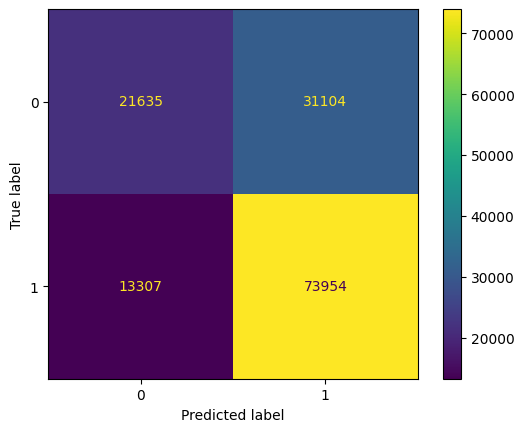

In [73]:
print("Accurary Score for XGBoost: ", accuracy_score(y_test, predict))
cm = confusion_matrix(y_test, predict)
report = classification_report(y_test, predict)
print('\n\rConfusion matrix for XGBoost:\n\r', cm)
print("\n\rClassification Report For XGBoost :\n\r", report)
xgbCMD=  ConfusionMatrixDisplay(cm)#.plot(ax=axs[0, 0]) 
xgbCMD.plot();
#     axs[0, 0].title.set_text("Confusion Matrix Random Forest")

In [74]:
finalPredictProb = model1.predict_proba(testDF[featureCols])[:, 1]

In [89]:
sub = pd.DataFrame()
sub["id"] = submit['id']
sub["diagnosed_diabetes"] = finalPredictProb

In [91]:
# sub = sub.loc["id", "diagnosed_diabetes"]
sub

,id,diagnosed_diabetes
0,700000,0.508166
1,700001,0.658381
2,700002,0.760041
3,700003,0.432468
4,700004,0.916233
...,...,...
299995,999995,0.729512
299996,999996,0.654681
299997,999997,0.567368
299998,999998,0.601277


In [92]:
sub.to_csv("submission.csv", index=False)

In [94]:
# final = pd.read_csv("subumission.csv")
# final